# 0 Utils

## 0.1 Imports and paths

In [33]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

user_study_data_folder = f'/home/janko/Desktop/social-dining/data/user-study'

pre_study_questionnaire_file = f'{user_study_data_folder}/questionnaires/Pre-StudyQuestionnaire.csv'
experiment_questionnaire_file = f'{user_study_data_folder}/questionnaires/ExperimentQuestionnaire.csv'
study_conditions_file = f'{user_study_data_folder}/conditions.csv'


## 0.2 Plotting

In [2]:
def get_colors_list(n):
    return list(mcolors.TABLEAU_COLORS.keys())[:n]

# To show grid lines behind data
plt.rc('axes', axisbelow=True)


## 0.3 Statistics

In [3]:
def print_array_stats(arr, label):
    print(f"{label}:\n \t Min: {np.min(arr)} \t Max: {np.max(arr)} \t Mean: {np.mean(arr)} \t Std: {np.std(arr)} \t Median: {np.median(arr)}")

def print_item_counts(items, label):
    total_count = sum([v for _, v in items])
    print(f'{label}:')
    for k, v in items:
        print(f'\t{k}: {v} ({100 * v / total_count:.2f}%)')


## 0.4 Load questionnaire and study conditions data

In [4]:
# Note: first two rows contain headers => use [2:]
pre_df = pd.read_csv(pre_study_questionnaire_file)[2:].reset_index(drop=True)
exp_df = pd.read_csv(experiment_questionnaire_file)[2:].reset_index(drop=True)

# Sort by video id ({session_id}_{participant_position})
pre_df  = pre_df.sort_values(by=['I2', 'I3']).reset_index(drop=True)
exp_df = exp_df.sort_values(by=['I1', 'I2']).reset_index(drop=True)

conditions_df = pd.read_csv(study_conditions_file).reset_index(drop=True)


# 1 Pre-study questionnaire

## 1.1 Data validation

In [5]:
assert all(pre_df['Progress'] == '100')
assert all(pre_df['Finished'] == 'True')
for i in range(len(pre_df) // 3):
    for j in range(3):
        # Session ID
        assert pre_df['I2'][i * 3 + j] == f'{i + 1:02d}', f"{i}_{j}: {pre_df['I2'][i * 3 + j]} != {i + 1:02d}"
        # Participant position
        assert pre_df['I3'][i * 3 + j][:1] == f'{j + 1:01d}', f"{i}_{j}: {pre_df['I3'][i * 3 + j]} != {j + 1:01d}"


## 1.2 Meal time
Time when the meal was eaten (i.e. when the experiment was performed).

Meal time (when the meal started):
 	 Min: 11 	 Max: 20 	 Mean: 14.9 	 Std: 3.1128764832546763 	 Median: 14.0


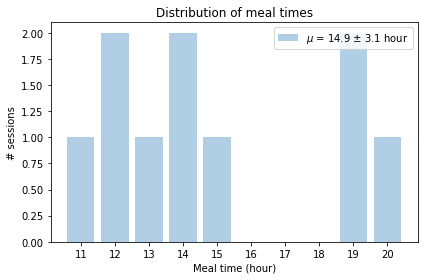

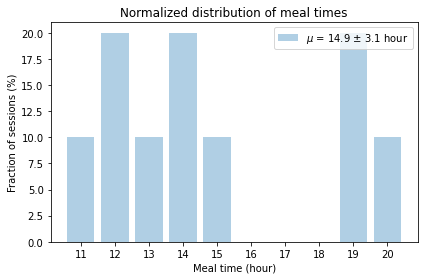

Meal times:
	Breakfast: 0 (0.00%)
	Lunch: 7 (70.00%)
	Dinner: 3 (30.00%)


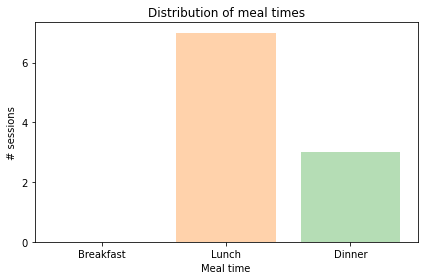

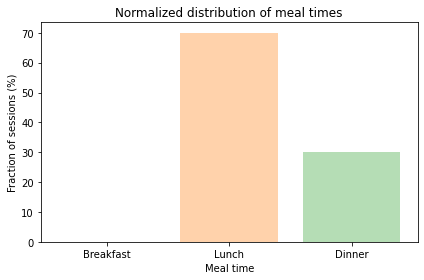

In [6]:
# Shift by two hours because the times (when the pre-study questionnaire was filled in) were automatically collected in the MDT time zone
meal_times = [ t.hour + 2 + (1 if t.minute > 30 else 0) for t in pd.to_datetime(pre_df['EndDate']) ]
for i in range(len(meal_times) // 3):
    # Check the meal times recorded for participants within one session agree
    assert len(set(meal_times[i * 3 : i * 3 + 3])) == 1, f'{i}: {meal_times[i * 3 : i * 3 + 3]}'
meal_times = meal_times[::3]
print_array_stats(meal_times, 'Meal time (when the meal started)')

plt.figure()
time_range = np.arange(min(meal_times), max(meal_times) + 2)
plt.bar(time_range[:-1], np.histogram(meal_times, bins=time_range)[0], alpha=0.35, label=fr'$\mu$ = {np.mean(meal_times):.1f} $\pm$ {np.std(meal_times):.1f} hour')
plt.legend()
plt.xticks(time_range[:-1], time_range[:-1])
plt.xlabel('Meal time (hour)')
plt.ylabel('# sessions')
plt.title("Distribution of meal times")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(time_range[:-1], np.histogram(meal_times, bins=time_range)[0] * 100 / (len(pre_df)//3), alpha=0.35, label=fr'$\mu$ = {np.mean(meal_times):.1f} $\pm$ {np.std(meal_times):.1f} hour')
plt.legend()
plt.xticks(time_range[:-1], time_range[:-1])
plt.xlabel('Meal time (hour)')
plt.ylabel('Fraction of sessions (%)')
plt.title("Normalized distribution of meal times")
plt.tight_layout()
plt.show()

# Categorize into breakfast, lunch, and dinner times
categorized_meal_times = dict(zip(['Breakfast', 'Lunch', 'Dinner'], np.histogram(meal_times, bins=[8, 10.5, 16, 21])[0]))
print_item_counts(categorized_meal_times.items(), 'Meal times')
plt.figure()
plt.bar(categorized_meal_times.keys(), categorized_meal_times.values(), alpha=0.35, color=get_colors_list(len(categorized_meal_times)))
plt.xlabel('Meal time')
plt.yticks(range(max(categorized_meal_times.values()) + 1)[::2])
plt.ylabel('# sessions')
plt.title("Distribution of meal times")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(categorized_meal_times.keys(), np.array(list(categorized_meal_times.values())) * 100 / (len(pre_df)//3), alpha=0.35, color=get_colors_list(len(categorized_meal_times)))
plt.xlabel('Meal time')
plt.ylabel('Fraction of sessions (%)')
plt.title("Normalized distribution of meal times")
plt.tight_layout()
plt.show()


## 1.3 Demographics

### 1.3.1 Age

Age:
 	 Min: 19 	 Max: 70 	 Mean: 26.833333333333332 	 Std: 9.187249618659306 	 Median: 24.0


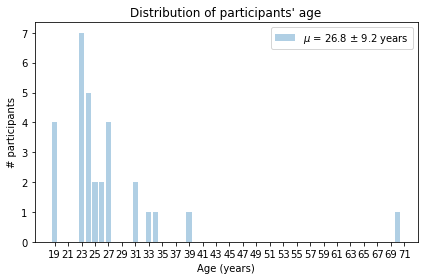

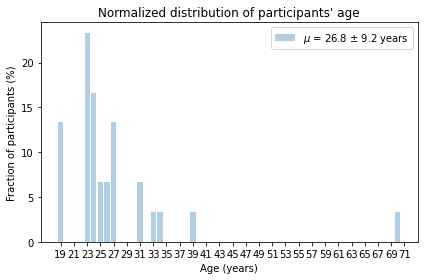

In [7]:
age = pd.to_numeric(pre_df['D1'])
print_array_stats(age, 'Age')

plt.figure()
age_range = np.arange(min(age), max(age) + 2)
plt.bar(age_range[:-1], np.histogram(age, bins=age_range)[0], alpha=0.35, label=fr'$\mu$ = {np.mean(age):.1f} $\pm$ {np.std(age):.1f} years')
plt.legend()
plt.xticks(age_range[::2])
plt.xlabel('Age (years)')
plt.ylabel('# participants')
plt.title("Distribution of participants' age")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(age_range[:-1], np.histogram(age, bins=age_range)[0] * 100 / len(pre_df), alpha=0.35, label=fr'$\mu$ = {np.mean(age):.1f} $\pm$ {np.std(age):.1f} years')
plt.legend()
plt.xticks(age_range[::2])
plt.xlabel('Age (years)')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' age")
plt.tight_layout()
plt.show()


### 1.3.2 Gender

Gender:
	Male: 14 (46.67%)
	Female: 16 (53.33%)


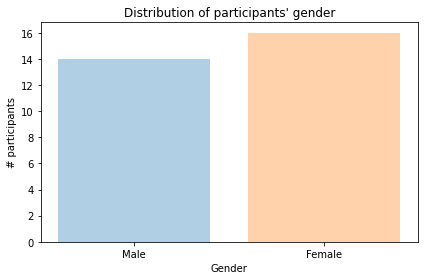

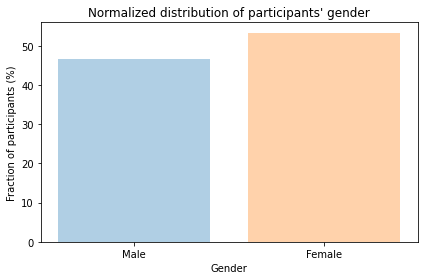

In [8]:
genders = Counter(pre_df['D2'])
print_item_counts(genders.items(), 'Gender')

plt.figure()
plt.bar(genders.keys(), genders.values(), alpha=0.35, color=get_colors_list(len(genders)))
plt.xlabel('Gender')
plt.ylabel('# participants')
plt.title("Distribution of participants' gender")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(genders.keys(), np.array(list(genders.values())) * 100 / len(pre_df), alpha=0.35, color=get_colors_list(len(genders)))
plt.xlabel('Gender')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' gender")
plt.tight_layout()
plt.show()


### 1.3.3 Race

Race:
	White: 13 (43.33%)
	Asian: 15 (50.00%)
	Other or two/more races: 1 (3.33%)
	Black or African American: 1 (3.33%)
		 White and Asian 


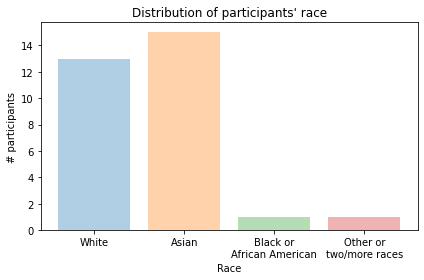

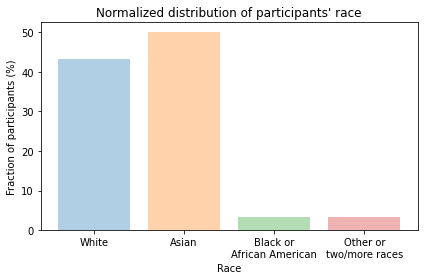

In [9]:
races_counter = Counter(pre_df['D3'])
print_item_counts(races_counter.items(), 'Race')

# Show details for 'Other or two/more races'
for i, race in enumerate(pre_df[f'D3']):
    if race == 'Other or two/more races':
        print(f"\t\t {pre_df[f'D3_6_TEXT'][i]}")

races = [
    'White',
    'Asian',
    'Black or African American',
    'Other or two/more races'
]
races_labels = [
    'White',
    'Asian',
    'Black or\nAfrican American',
    'Other or\ntwo/more races'
]
races_range = np.arange(len(races))
races_values = [races_counter[race] if race in races_counter else 0 for race in races]
plt.figure()
plt.bar(races_range, races_values, alpha=0.35, color=get_colors_list(len(races)))
plt.xticks(races_range, races_labels)
plt.xlabel('Race')
plt.ylabel('# participants')
plt.title("Distribution of participants' race")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(races_range, np.array(races_values) * 100 / len(pre_df), alpha=0.35, color=get_colors_list(len(races)))
plt.xticks(races_range, races_labels)
plt.xlabel('Race')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' race")
plt.tight_layout()
plt.show()


In [ ]:
# If you want to further categorize the responses to 'Other or two/more races' into Hispanic, White-Asian, Asian-Hispanic, White-Hispanic
# then make the following changes to the Pre-StudyQuestionnaire.csv file and run this cell
# 02_2    White and Asian       => White-Asian
# 05_3    Asian / Latino        => Asian-Hispanic
# 09_1    white/Latino          => White-Hispanic
# 09_2    Asian and white       => White-Asian
# 15_1    Latinx                => Hispanic
# 15_3    Latino                => Hispanic
# 19_1    Asian/White           => White-Asian
# 21_3    White and Hispanic    => White-Hispanic
# 23_2    White/Latino          => White-Hispanic

races = []
for i, race in enumerate(pre_df['D3']):
    if race == 'Other or two/more races':
        races.append(pre_df['D3_6_TEXT'][i])
    else:
        races.append(race)

races = Counter(races).most_common()
print_item_counts(races, 'Race')

keys, values = zip(*races[::-1])
plt.figure()
plt.barh(keys, values, alpha=0.35, color=get_colors_list(len(races))[::-1])
plt.ylabel('Race')
plt.xlabel('# participants')
plt.title("Distribution of participants' race")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(keys, np.array(values) * 100 / 90, alpha=0.35, color=get_colors_list(len(races))[::-1])
plt.ylabel('Race')
plt.xlabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' race")
plt.tight_layout()
plt.show()


### 1.3.4 Dominant hand

Dominant hand:
	Right: 25 (83.33%)
	Left: 5 (16.67%)


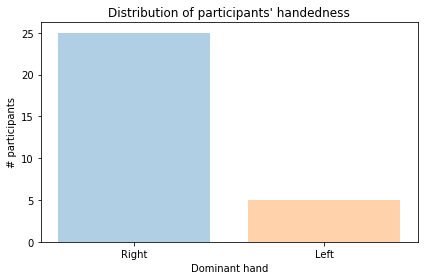

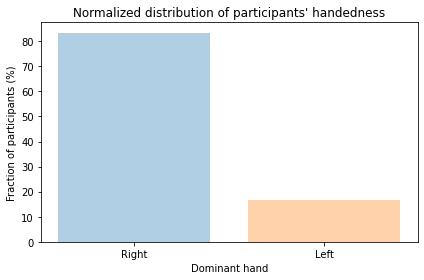

In [10]:
handedness = Counter(pre_df['D4'])
print_item_counts(handedness.items(), 'Dominant hand')

plt.figure()
plt.bar(handedness.keys(), handedness.values(), alpha=0.35, color=get_colors_list(len(handedness)))
plt.xlabel('Dominant hand')
plt.ylabel('# participants')
plt.title("Distribution of participants' handedness")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(handedness.keys(), np.array(list(handedness.values())) * 100 / len(pre_df), alpha=0.35, color=get_colors_list(len(handedness)))
plt.xlabel('Dominant hand')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' handedness")
plt.tight_layout()
plt.show()


## 1.4 Relationship to co-diners

Each of 90 participants assessed their relationship with their 2 co-diners => 180 one-directional assessments<br>
In fact, they might not mutually agree.

### 1.4.1 Relationship type

Relationship type:
	Friend: 45 (75.00%)
	Other, please specify: 7 (11.67%)
	Partner: 4 (6.67%)
	Professional (co-worker/classmate): 4 (6.67%)
		 Co-worker of a friend
		 I don’t know these people
		 First time met
		 cohort
		 First time meet and eat together
		 I don’t know this person 
		 Friend of a friend


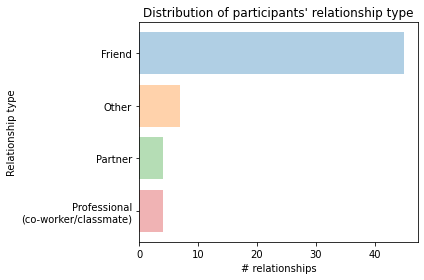

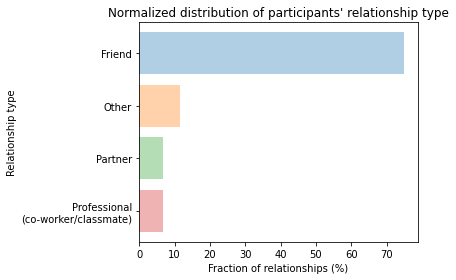

In [11]:
relationship_types = (Counter(pre_df['L1']) + Counter(pre_df['R1'])).most_common()[::-1]
print_item_counts(relationship_types[::-1], 'Relationship type')

for position in ['L', 'R']:
    for i, relationship in enumerate(pre_df[f'{position}1']):
        if relationship == 'Other, please specify':
            print(f"\t\t {pre_df[f'{position}1_4_TEXT'][i]}")

plt.figure()
plt.barh([f'{k.split(" ")[0]}\n{k.split(" ")[1]}' if len(k) > 22 else k.split(',')[0] for k, _ in relationship_types], [v for _, v in relationship_types], alpha=0.35, color=get_colors_list(len(relationship_types))[::-1])
plt.ylabel('Relationship type')
plt.xlabel('# relationships')
plt.title("Distribution of participants' relationship type")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh([f'{k.split(" ")[0]}\n{k.split(" ")[1]}' if len(k) > 22 else k.split(',')[0] for k, _ in relationship_types], 
         np.array([v for _, v in relationship_types]) * 100 / (2*len(pre_df)), alpha=0.35, color=get_colors_list(len(relationship_types))[::-1])
plt.ylabel('Relationship type')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' relationship type")
plt.tight_layout()
plt.show()


### 1.4.2 Relationship duration

Relationship duration:
	1 month - 1 year: 19 (31.67%)
	1 year - 2 years: 12 (20.00%)
	2 years - 5 years: 11 (18.33%)
	Less than 1 month: 10 (16.67%)
	More than 5 years: 8 (13.33%)


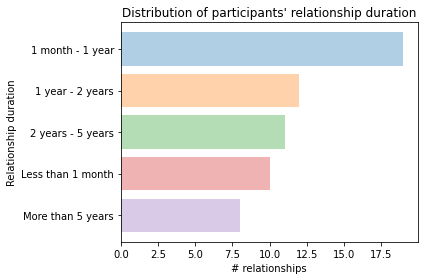

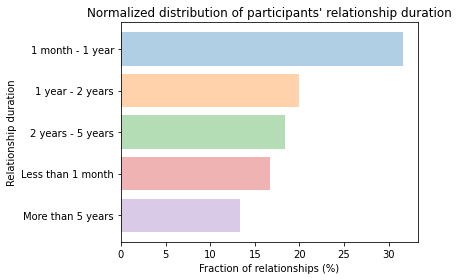

In [12]:
relationship_durations = Counter(pre_df['L2']) + Counter(pre_df['R2'])
relationship_durations = sorted(relationship_durations.items())
print_item_counts(relationship_durations, 'Relationship duration')

keys, values = zip(*relationship_durations[::-1])
plt.figure()
plt.barh(keys, values, alpha=0.35, color=get_colors_list(len(relationship_durations))[::-1])
plt.ylabel('Relationship duration')
plt.xlabel('# relationships')
plt.title("Distribution of participants' relationship duration")
plt.tight_layout()
plt.show()

keys, values = zip(*relationship_durations[::-1])
plt.figure()
plt.barh(keys, np.array(values) * 100 / (2*len(pre_df)), alpha=0.35, color=get_colors_list(len(relationship_durations))[::-1])
plt.ylabel('Relationship duration')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' relationship duration")
plt.tight_layout()
plt.show()


### 1.4.3 Frequency of eating together

Frequency of eating together:
	Several times a day: 4 (6.67%)
	Almost every day: 4 (6.67%)
	Few times a week: 14 (23.33%)
	Few times a month: 18 (30.00%)
	Few times a year: 9 (15.00%)
	Never
(this is the first time): 11 (18.33%)


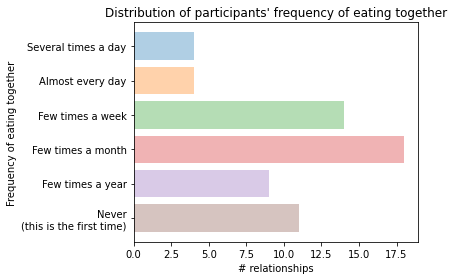

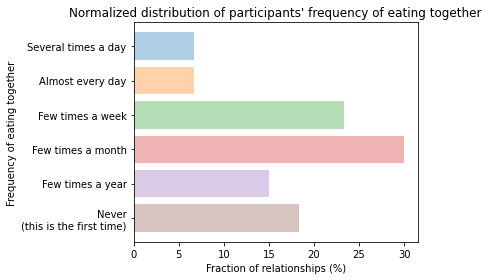

In [13]:
# Frequency of eating together (i.e. commensality frequency)
eating_together_freq = Counter(pre_df['L3']) + Counter(pre_df['R3'])
eating_together_freq = dict(sorted(eating_together_freq.items()))

# Shorten the longest key and impose key order
eating_together_freq['Never\n(this is the first time)'] = eating_together_freq['Never (this is the first time we are eating together)']
del eating_together_freq['Never (this is the first time we are eating together)']
eating_together_freq = { key : eating_together_freq[key] for key in ['Never\n(this is the first time)', 'Few times a year', 'Few times a month', 'Few times a week', 'Almost every day', 'Several times a day'] }
print_item_counts(list(eating_together_freq.items())[::-1], 'Frequency of eating together')

plt.figure()
plt.barh(list(eating_together_freq.keys()), eating_together_freq.values(), alpha=0.35, color=get_colors_list(len(eating_together_freq))[::-1])
plt.ylabel('Frequency of eating together')
plt.xlabel('# relationships')
plt.title("Distribution of participants' frequency of eating together")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(list(eating_together_freq.keys()), np.array(list(eating_together_freq.values())) * 100 / (2*len(pre_df)), alpha=0.35, color=get_colors_list(len(eating_together_freq))[::-1])
plt.ylabel('Frequency of eating together')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' frequency of eating together")
plt.tight_layout()
plt.show()


## 1.5 Social dining habits

### 1.5.1 Co-diner type

Co-diner type:
Breakfast:
	Alone: 22 (73.33%)
	Random people: 0 (0.00%)
	Co-workers: 0 (0.00%)
	Friends/roommates: 6 (20.00%)
	Family: 2 (6.67%)
	Other: 0 (0.00%)
Lunch:
	Alone: 10 (33.33%)
	Random people: 1 (3.33%)
	Co-workers: 10 (33.33%)
	Friends/roommates: 9 (30.00%)
	Family: 0 (0.00%)
	Other: 0 (0.00%)
Dinner:
	Alone: 8 (26.67%)
	Random people: 0 (0.00%)
	Co-workers: 0 (0.00%)
	Friends/roommates: 19 (63.33%)
	Family: 3 (10.00%)
	Other: 0 (0.00%)


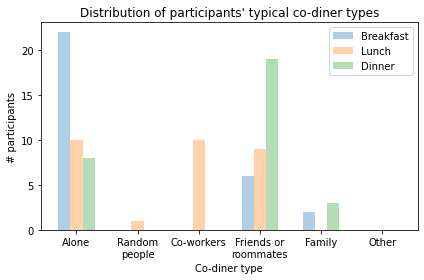

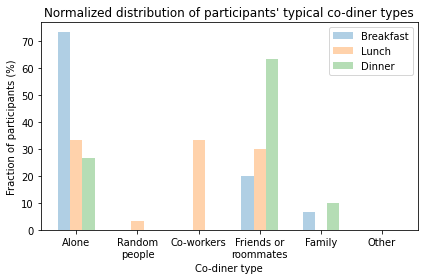

In [14]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
codiner_types = ['Alone', 'Random people', 'Co-workers', 'Friends/roommates', 'Family', 'Other, please specify']
codiner_types_labels = ['Alone', 'Random\npeople', 'Co-workers', 'Friends or\nroommates', 'Family', 'Other']
keys_range = np.arange(len(codiner_types))
ys = []
print('Co-diner type:')
plt.figure()
for i, meal_type in enumerate(meal_types):
    codiner_counter = Counter(pre_df[f'S1_{i + 1}'])
    # For the remaining types, impose key order and add zero counts
    codiner_counter_sorted = { codiner_type: 0 if codiner_type not in codiner_counter else codiner_counter[codiner_type] for codiner_type in codiner_types }
    # Rename the key for 'Other' co-diner types
    codiner_counter_sorted['Other'] = codiner_counter['Other, please specify']
    del codiner_counter_sorted['Other, please specify']
    print_item_counts(list(codiner_counter_sorted.items()), meal_type)

    # Show details of 'Other' co-diner types
    for j, codiner_type in enumerate(pre_df[f'S1_{i + 1}']):
        if codiner_type == 'Other, please specify':
            print(f"\t\t {pre_df[f'S1_{i + 1}_6_TEXT'][j]}")

    y = codiner_counter_sorted.values()
    ys.append(np.array(list(y)))
    plt.bar(keys_range + 0.2 * (i - 1), y, alpha=0.35, width=0.2, label=meal_type)
plt.xticks(keys_range, codiner_types_labels)
plt.xlabel('Co-diner type')
plt.ylabel('# participants')
plt.title("Distribution of participants' typical co-diner types")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(keys_range + 0.2 * (i - 1), ys[i] * 100 / len(pre_df), alpha=0.35, width=0.2, label=meal_type)
plt.xticks(keys_range, codiner_types_labels)
plt.xlabel('Co-diner type')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' typical co-diner types")
plt.legend()
plt.tight_layout()
plt.show()


### 1.5.2 Social dining frequency

Social dining frequency:
Breakfast:
 	 Min: 0 	 Max: 7 	 Mean: 1.9 	 Std: 2.413158373031769 	 Median: 1.0
Lunch:
 	 Min: 0 	 Max: 7 	 Mean: 3.7333333333333334 	 Std: 2.0483055327649624 	 Median: 3.0
Dinner:
 	 Min: 1 	 Max: 7 	 Mean: 4.6 	 Std: 2.169485346036397 	 Median: 4.5


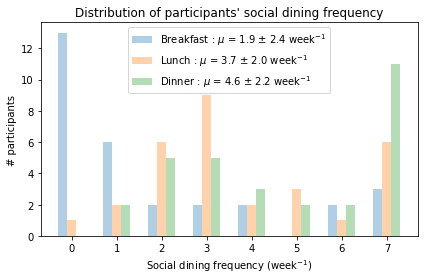

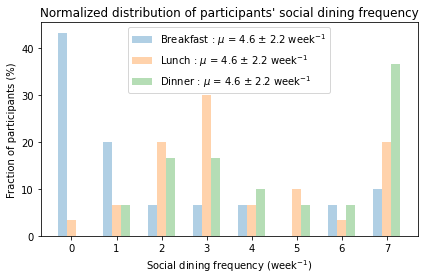

In [15]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
freq_range = np.arange(9)
print('Social dining frequency:')
ys = []
plt.figure()
for i, meal_type in enumerate(meal_types):
    sd_freq = pd.to_numeric(pre_df[f'S2_{i + 1}'])
    print_array_stats(sd_freq, meal_type)
    y = np.histogram(sd_freq, bins=freq_range)[0]
    ys.append(y)
    plt.bar(freq_range[:-1] + 0.2 * (i - 1), y, alpha=0.35, width=0.2, label=fr'{meal_type} : $\mu$ = {np.mean(sd_freq):.1f} $\pm$ {np.std(sd_freq):.1f} week$^{{-1}}$')
plt.legend()
plt.xlabel(fr'Social dining frequency (week$^{{-1}}$)')
plt.ylabel('# participants')
plt.title("Distribution of participants' social dining frequency")
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(freq_range[:-1] + 0.2 * (i - 1), ys[i] * 100 / len(pre_df), alpha=0.35, width=0.2, label=fr'{meal_type} : $\mu$ = {np.mean(sd_freq):.1f} $\pm$ {np.std(sd_freq):.1f} week$^{{-1}}$')
plt.legend()
plt.xlabel(fr'Social dining frequency (week$^{{-1}}$)')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' social dining frequency")
plt.tight_layout()
plt.show()


### 1.5.3 Dining location

Dining location:
Breakfast:
	At home: 27 (90.00%)
	At restaurant: 1 (3.33%)
	At work: 1 (3.33%)
	Other: 1 (3.33%)
		 I don’t eat breakfast 
Lunch:
	At home: 9 (30.00%)
	At restaurant: 0 (0.00%)
	At work: 21 (70.00%)
	Other: 0 (0.00%)
Dinner:
	At home: 23 (76.67%)
	At restaurant: 2 (6.67%)
	At work: 5 (16.67%)
	Other: 0 (0.00%)


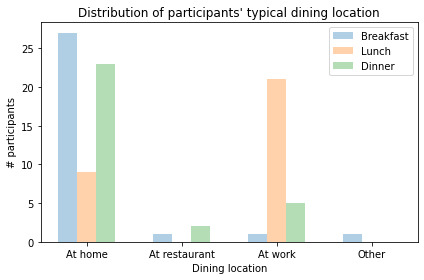

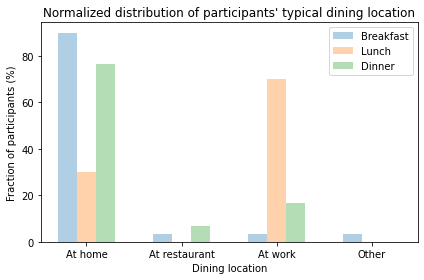

In [16]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
keys_range = np.arange(4)
locations = ['At home', 'At restaurant', 'At work', 'Other']
print('Dining location:')
ys = []
plt.figure()
for i, meal_type in enumerate(meal_types):
    dining_loc_counter = Counter(pre_df[f'S3_{i + 1}'])
    # Rename the key for 'Other' dining locations
    dining_loc_counter['Other'] = dining_loc_counter['Other, please specify']
    del dining_loc_counter['Other, please specify']
    for location in locations:
        if location not in dining_loc_counter:
            dining_loc_counter[location] = 0
    dining_loc = sorted(dining_loc_counter.items())
    print_item_counts(dining_loc, meal_type)

    # Show details of 'Other' co-diner types
    for j, codiner_type in enumerate(pre_df[f'S3_{i + 1}']):
        if codiner_type == 'Other, please specify':
            print(f"\t\t {pre_df[f'S3_{i + 1}_4_TEXT'][j]}")

    y = [v for _, v in dining_loc]
    ys.append(np.array(y))
    plt.bar(keys_range + 0.2 * (i - 1), y, width=0.2, alpha=0.35, label=meal_type)
plt.xticks(keys_range, locations)
plt.xlabel('Dining location')
plt.ylabel('# participants')
plt.legend()
plt.title("Distribution of participants' typical dining location")
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(keys_range + 0.2 * (i - 1), ys[i] * 100 / len(pre_df), width=0.2, alpha=0.35, label=meal_type)
plt.xticks(keys_range, locations)
plt.xlabel('Dining location')
plt.ylabel('Fraction of participants (%)')
plt.legend()
plt.title("Normalized distribution of participants' typical dining location")
plt.tight_layout()
plt.show()


## 1.6 Permission to present identifiable data

In [19]:
permission_types = {
    'I grant full permission for the use of audio and video recordings as described above.': 'Full permission',
    'I grant permission provided that my face is de-identified.': 'Face must be de-identified',
    'I decline this optional permission.': 'Declined'
}

print('Permission to present identifiable data')
permissions_df = pd.DataFrame().assign(Participant_ID=pre_df['I2'] + '_' + pre_df['I3'], 
                                       Permission=pre_df['Q1'].apply(lambda x: permission_types[x]),
                                       Permission_Full=pre_df['Q1']
                                      )
permissions_df


Permission to present identifiable data


,Participant_ID,Permission,Permission_Full
0,01_1 (with the robot),Full permission,I grant full permission for the use of audio a...
1,01_2,Full permission,I grant full permission for the use of audio a...
2,01_3,Full permission,I grant full permission for the use of audio a...
3,02_1 (with the robot),Face must be de-identified,I grant permission provided that my face is de...
4,02_2,Full permission,I grant full permission for the use of audio a...
5,02_3,Full permission,I grant full permission for the use of audio a...
6,03_1 (with the robot),Full permission,I grant full permission for the use of audio a...
7,03_2,Face must be de-identified,I grant permission provided that my face is de...
8,03_3,Face must be de-identified,I grant permission provided that my face is de...
9,04_1 (with the robot),Face must be de-identified,I grant permission provided that my face is de...


In [20]:
# Print out the permissions for copy to the User Study Participants & Design sheet with participants
print(*permissions_df['Permission'], sep='\n')


Full permission
Full permission
Full permission
Face must be de-identified
Full permission
Full permission
Full permission
Face must be de-identified
Face must be de-identified
Face must be de-identified
Face must be de-identified
Face must be de-identified
Full permission
Full permission
Face must be de-identified
Full permission
Full permission
Full permission
Full permission
Full permission
Full permission
Full permission
Full permission
Full permission
Full permission
Full permission
Face must be de-identified
Full permission
Face must be de-identified
Full permission


## 1.7 Level of hunger

Level of participant hunger::
 	 Min: 2 	 Max: 4 	 Mean: 3.1333333333333333 	 Std: 0.669991708074726 	 Median: 3.0
Level of participant hunger::
	1: 0 (0.00%)
	2: 5 (16.67%)
	3: 16 (53.33%)
	4: 9 (30.00%)
	5: 0 (0.00%)


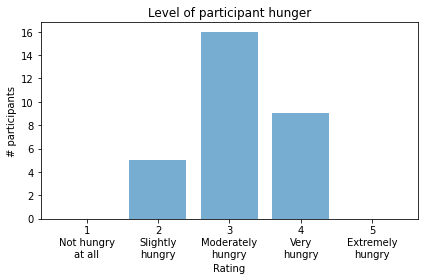

In [21]:
prompt = 'Please rate your level of hunger'

hunger_level_labels = [
    '1\nNot hungry\nat all',
    '2\nSlightly\nhungry',
    '3\nModerately\nhungry',
    '4\nVery\nhungry',
    '5\nExtremely\nhungry'
]

hunger_level_range = np.arange(1, 1 + len(hunger_level_labels))
hunger_level_counter = Counter([int(x[0]) for x in pre_df['H1']])
for hunger_level in hunger_level_range:
    if hunger_level not in hunger_level_counter:
        hunger_level_counter[hunger_level] = 0

print_array_stats([int(x[0]) for x in pre_df['H1']], 'Level of participant hunger:')
print_item_counts(sorted(hunger_level_counter.items()), 'Level of participant hunger:')

plt.figure()
plt.bar(hunger_level_counter.keys(), hunger_level_counter.values(), alpha=0.6)
plt.xticks(hunger_level_range, hunger_level_labels)
plt.xlabel('Rating')
plt.ylabel('# participants')
plt.title(f'Level of participant hunger')
plt.tight_layout()
plt.show()


# 2 Experiment questionnaire

## 2.1 Data validation

In [22]:
assert all(exp_df['Progress'] == '100')
assert all(exp_df['Finished'] == 'True')
for i in range(len(exp_df) // 3):
    for j in range(3):
        # Session ID
        assert exp_df['I1'][i * 3 + j] == f'{i + 1:02d}', f"{i}_{j}: {exp_df['I1'][i * 3 + j]} != {i + 1:02d}"
        # Participant position
        assert exp_df['I2'][i * 3 + j][:1] == f'{j + 1:01d}', f"{i}_{j}: {exp_df['I2'][i * 3 + j]} != {j + 1:01d}"


## 2.2 Bite timing strategy comparison: Fixed-Interval, Mouth-Open, Learned

In [24]:
condition_labels = {
    'a': 'Fixed-Interval', 
    'b': 'Mouth-Open', 
    'c': 'Learned'
}

# sessions x trials
# Drop the session id column
study_conditions = conditions_df.to_numpy()[:len(exp_df) // 3, 1:]
study_conditions

array([['a', 'b', 'c', 'b', 'a', 'c', 'a', 'b', 'c', 'a'],
       ['b', 'a', 'b', 'a', 'c', 'a', 'c', 'b', 'c', 'b'],
       ['a', 'b', 'a', 'b', 'c', 'b', 'c', 'a', 'c', 'a'],
       ['c', 'a', 'b', 'c', 'a', 'b', 'a', 'c', 'b', 'c'],
       ['c', 'b', 'c', 'b', 'a', 'c', 'a', 'b', 'a', 'c'],
       ['b', 'a', 'c', 'b', 'a', 'c', 'a', 'b', 'c', 'b'],
       ['a', 'b', 'c', 'b', 'a', 'c', 'a', 'c', 'b', 'a'],
       ['a', 'c', 'a', 'c', 'b', 'c', 'b', 'a', 'b', 'a'],
       ['c', 'b', 'a', 'b', 'c', 'a', 'c', 'a', 'b', 'c'],
       ['b', 'c', 'a', 'b', 'c', 'b', 'a', 'c', 'a', 'b']], dtype=object)

In [30]:
prompts = {
    '1': 'Please rate how timely the robot assisted with feeding',
    '2_1': 'I felt distracted by the robot',
    '2_2': 'I was able to have a natural conversation with the group',
    '2_3': 'I felt comfortable around the robot',
    '2_4': 'The system is reliable',
    '2_5': 'I can trust the system'
}

target_ratings = {}
codiner_ratings = {}
overall_ratings = {}

for prompt_key in prompts.keys():
    target_ratings[prompt_key] = {'a': [], 'b': [], 'c': []}
    codiner_ratings[prompt_key] = {'a': [], 'b': [], 'c': []}
    overall_ratings[prompt_key] = {'a': [], 'b': [], 'c': []}

    for trial in range(1, 11):
        ratings = [ int(rating[0]) for rating in exp_df[f'T{trial}-{prompt_key}'] ]

        for session_idx, trial_condition in enumerate(study_conditions[:len(ratings)//3, trial - 1]):
            target_ratings[prompt_key][trial_condition].append( ratings[session_idx*3] )
            codiner_ratings[prompt_key][trial_condition].extend( [ratings[session_idx*3 + 1], ratings[session_idx*3 + 2]] )
            overall_ratings[prompt_key][trial_condition].extend( [ratings[session_idx*3], ratings[session_idx*3 + 1], ratings[session_idx*3 + 2]] )
    
    # NOT BALANCED - only relative counts are balanced!!!
#     assert len(target_ratings[prompt_key]['a']) == len(target_ratings[prompt_key]['b']) == len(target_ratings[prompt_key]['c'])
#     assert len(codiner_ratings[prompt_key]['a']) == len(codiner_ratings[prompt_key]['b']) == len(codiner_ratings[prompt_key]['c'])


### 2.2.1 By bite timing appropriateness

#### 2.2.1.1 Absolute ratings

In [38]:
json.dumps(target_ratings['1'])

'{"a": [3, 3, 2, 4, 5, 3, 4, 3, 4, 2, 5, 4, 4, 3, 2, 2, 5, 4, 3, 4, 3, 5, 4, 4, 5, 3, 3, 3, 3, 5, 4, 4, 2, 3], "b": [4, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 1, 3, 3, 3, 4, 4], "c": [4, 4, 3, 4, 4, 2, 2, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 4, 3, 3, 4, 3, 1, 3, 3, 3, 3, 1, 3]}'

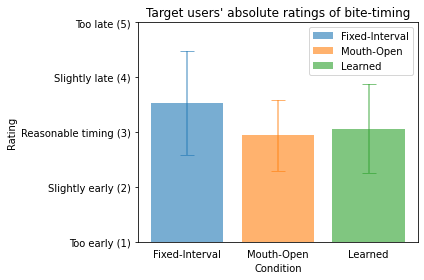

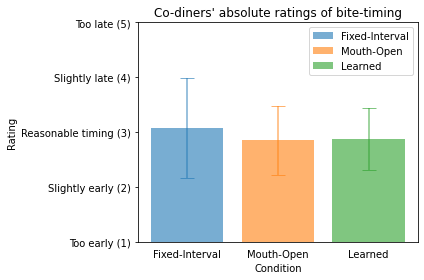

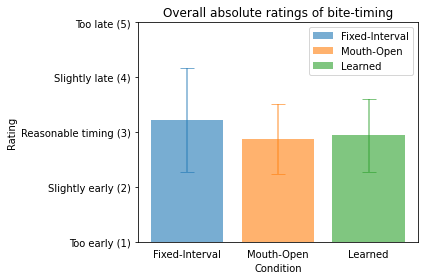

In [39]:
# rating_labels = ['1 - Too early', '2 - Slightly early', '3 - Reasonable timing', '4 - Slightly late', '5 - Too late']
rating_labels = ['Too early (1)', 'Slightly early (2)', 'Reasonable timing (3)', 'Slightly late (4)', 'Too late (5)']
titles = ["Target users' absolute ratings of bite-timing", 
          "Co-diners' absolute ratings of bite-timing",
          "Overall absolute ratings of bite-timing"
         ]

prompt_key = '1'
alpha = 0.6
color = get_colors_list(1)[0]
err_kw = dict(alpha=alpha, capsize=7, capthick=None)
x_pos = np.arange(3)
for ratings_data, title in zip([target_ratings[prompt_key], codiner_ratings[prompt_key], overall_ratings[prompt_key]], titles):
    plt.figure()
    means = [np.mean(ratings_data[condition]) for condition in ['a', 'b', 'c']]
    stds = [np.std(ratings_data[condition]) for condition in ['a', 'b', 'c']]
    for x, mu, std, label, ecolor in zip(x_pos, means, stds, condition_labels.values(), get_colors_list(3)):
        err_kw.update(ecolor=ecolor)
        plt.bar(x, mu, alpha=alpha, yerr=std, error_kw=err_kw, label=label)
    plt.xticks(x_pos, condition_labels.values())
    plt.xlabel('Condition')
    plt.yticks(np.arange(5) + 1, rating_labels)
    plt.ylim(1, 5)
    plt.ylabel('Rating')
    plt.title(title)
#     plt.grid(axis='y')
    plt.tick_params(bottom=False)
    plt.legend()
    plt.tight_layout()
    plt.show()


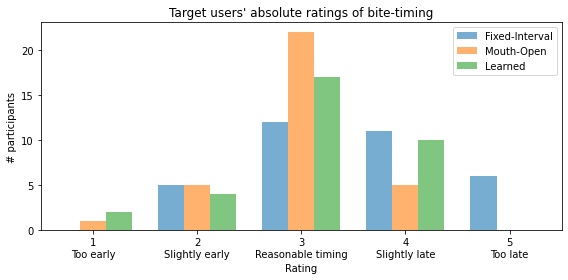

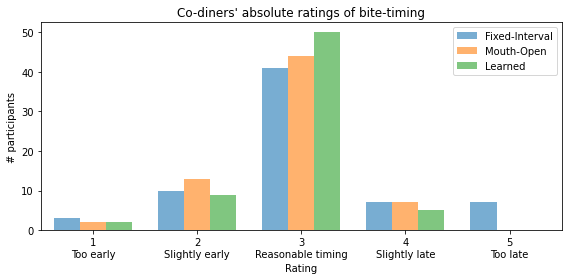

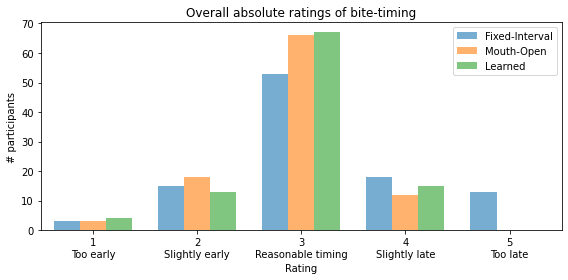

In [40]:
rating_labels = ['1\nToo early', '2\nSlightly early', '3\nReasonable timing', '4\nSlightly late', '5\nToo late']
titles = ["Target users' absolute ratings of bite-timing", 
          "Co-diners' absolute ratings of bite-timing",
          "Overall absolute ratings of bite-timing"
         ]

prompt_key = '1'
for ratings_data, title in zip([target_ratings[prompt_key], codiner_ratings[prompt_key], overall_ratings[prompt_key]], titles):
    plt.figure(figsize=(8, 4))
    bin_width = 0.25
    for i, (condition, ratings) in enumerate(ratings_data.items()):
        counts = Counter(ratings)
        x_pos = [x + (i - 1.5)*bin_width for x in counts.keys() ]
        plt.bar(x_pos, counts.values(), width=bin_width, align='edge', label=condition_labels[condition], alpha=0.6)

    plt.xlim(0.5, 5.5)
    plt.xticks(np.arange(5) + 1, rating_labels)
    plt.xlabel('Rating')
    plt.ylabel('# participants')
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()


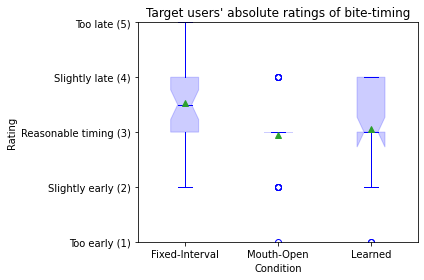

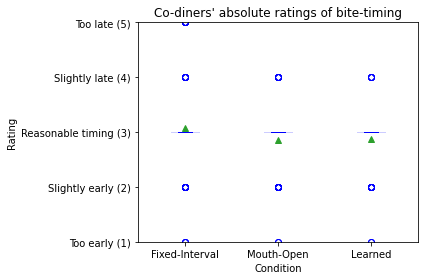

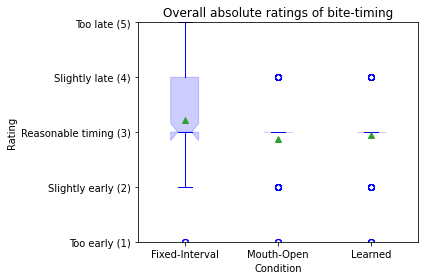

In [41]:
# rating_labels = ['1 - Too early', '2 - Slightly early', '3 - Reasonable timing', '4 - Slightly late', '5 - Too late']
rating_labels = ['Too early (1)', 'Slightly early (2)', 'Reasonable timing (3)', 'Slightly late (4)', 'Too late (5)']
titles = ["Target users' absolute ratings of bite-timing", 
          "Co-diners' absolute ratings of bite-timing",
          "Overall absolute ratings of bite-timing"
         ]

prompt_key = '1'
for ratings_data, title in zip([target_ratings[prompt_key], codiner_ratings[prompt_key], overall_ratings[prompt_key]], titles):
    plt.figure()
    c = 'blue'       
    plt.boxplot([ratings_data['a'], ratings_data['b'], ratings_data['c']],
                # meanline=True, 
                showmeans=True,
                notch=True,
                showfliers=True,
                patch_artist=True,
                boxprops=dict(facecolor=c, color=c, alpha=0.2),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
               )
    plt.xticks(np.arange(3) + 1, condition_labels.values())
    plt.xlabel('Condition')
    plt.yticks(np.arange(5) + 1, rating_labels)
    plt.ylim(1, 5)
    plt.ylabel('Rating')
    plt.title(title)
    plt.tight_layout()
    plt.show()


#### 2.2.1.2 Relative ratings (overall/three-way comparison)

In [54]:
relative_target_ratings = {'a': 0, 'b': 0, 'c': 0}
relative_codiner_ratings = {'a': 0, 'b': 0, 'c': 0}
relative_overall_ratings = {'a': 0, 'b': 0, 'c': 0}

for trial in range(2, 11):
    ratings = [ rating for rating in exp_df[f'T{trial}-1-compare'] ]

    for session_idx, trial_condition in enumerate(study_conditions[:len(ratings)//3, trial - 1]):
        prev_trial_condition = study_conditions[session_idx, trial - 2]
        
        relative_target_ratings[trial_condition  if ratings[session_idx*3]     == 'This trial' else prev_trial_condition] += 1
        relative_codiner_ratings[trial_condition if ratings[session_idx*3 + 1] == 'This trial' else prev_trial_condition] += 1
        relative_codiner_ratings[trial_condition if ratings[session_idx*3 + 2] == 'This trial' else prev_trial_condition] += 1

        relative_overall_ratings[trial_condition if ratings[session_idx*3]     == 'This trial' else prev_trial_condition] += 1
        relative_overall_ratings[trial_condition if ratings[session_idx*3 + 1] == 'This trial' else prev_trial_condition] += 1
        relative_overall_ratings[trial_condition if ratings[session_idx*3 + 2] == 'This trial' else prev_trial_condition] += 1
        

In [55]:
assert sum(relative_target_ratings.values()) == (study_conditions.shape[1] - 1) * len(exp_df)//3
assert sum(relative_codiner_ratings.values()) == 2 * (study_conditions.shape[1] - 1) * len(exp_df)//3


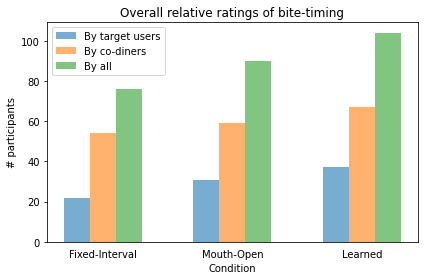

In [56]:
plt.figure()
bin_width = 0.2
for i, (rater_label, ratings) in enumerate(zip(['By target users', 'By co-diners', 'By all'], [relative_target_ratings, relative_codiner_ratings, relative_overall_ratings])): 
    y = [ratings[condition] for condition in condition_labels.keys()]
    x_pos = [x + (i - 1.5)*bin_width for x in range(3) ]
    plt.bar(x_pos, y, width=bin_width, align='edge', label=rater_label, alpha=0.6)

plt.xticks(np.arange(3), condition_labels.values())
plt.xlabel('Condition')
plt.ylabel('# participants')
plt.legend()
plt.title('Overall relative ratings of bite-timing')
plt.tick_params(bottom=False)
plt.tight_layout()
plt.show()


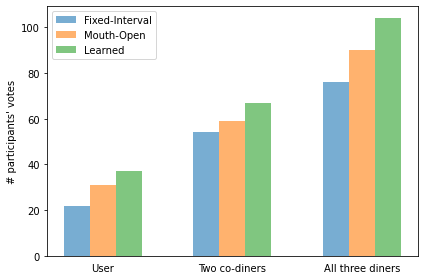

In [67]:
# Repeat the above but group bars by target/codiners/all and color by condition/method
plt.figure()
bin_width = 0.2
ys = []
x_pos = []
for i, (rater_label, ratings) in enumerate(zip(['By target users', 'By co-diners', 'By all'], [relative_target_ratings, relative_codiner_ratings, relative_overall_ratings])): 
    ys.extend( [ratings[condition] for condition in condition_labels.keys()] )
    x_pos.extend( [x + (i - 1.5)*bin_width for x in range(3) ] )

for i, condition in enumerate(condition_labels.values()):
    plt.bar(x_pos[3*i:3*i+3], ys[i::3], width=bin_width, align='edge', label=condition, alpha=0.6)

plt.xticks(np.arange(3), ['User', 'Two co-diners', 'All three diners'])
# plt.xlabel('Condition')
plt.ylabel("# participants' votes")
plt.legend()
# plt.title('Overall relative ratings of bite-timing')
plt.tick_params(bottom=False)
plt.tight_layout()
plt.show()


#### 2.2.1.3 Relative ratings (pair-wise comparison)

In [45]:
comparison_types = ['ab', 'ac', 'bc']
relative_target_ratings = { comparison_type: {condition: 0 for condition in comparison_type} for comparison_type in comparison_types }
relative_codiner_ratings = { comparison_type: {condition: 0 for condition in comparison_type} for comparison_type in comparison_types }
relative_overall_ratings = { comparison_type: {condition: 0 for condition in comparison_type} for comparison_type in comparison_types }

for trial in range(2, 11):
    ratings = [ rating for rating in exp_df[f'T{trial}-1-compare'] ]

    for session_idx, trial_condition in enumerate(study_conditions[:len(ratings)//3, trial - 1]):
        prev_trial_condition = study_conditions[session_idx, trial - 2]
        
        comparison_type = trial_condition + prev_trial_condition if trial_condition < prev_trial_condition else prev_trial_condition + trial_condition
        
        relative_target_ratings[comparison_type][trial_condition  if ratings[session_idx*3]     == 'This trial' else prev_trial_condition] += 1
        relative_codiner_ratings[comparison_type][trial_condition if ratings[session_idx*3 + 1] == 'This trial' else prev_trial_condition] += 1
        relative_codiner_ratings[comparison_type][trial_condition if ratings[session_idx*3 + 2] == 'This trial' else prev_trial_condition] += 1

        relative_overall_ratings[comparison_type][trial_condition if ratings[session_idx*3]     == 'This trial' else prev_trial_condition] += 1
        relative_overall_ratings[comparison_type][trial_condition if ratings[session_idx*3 + 1] == 'This trial' else prev_trial_condition] += 1
        relative_overall_ratings[comparison_type][trial_condition if ratings[session_idx*3 + 2] == 'This trial' else prev_trial_condition] += 1
        

In [46]:
relative_target_ratings, relative_codiner_ratings

({'ab': {'a': 13, 'b': 17}, 'ac': {'a': 9, 'c': 21}, 'bc': {'b': 14, 'c': 16}},
 {'ab': {'a': 30, 'b': 30},
  'ac': {'a': 24, 'c': 36},
  'bc': {'b': 29, 'c': 31}})

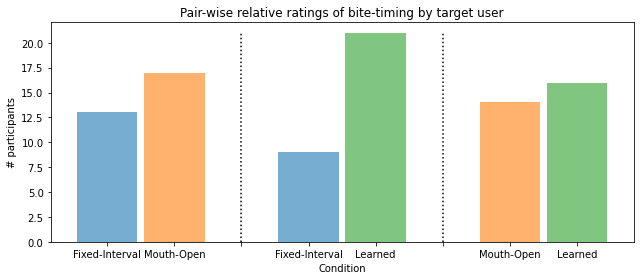

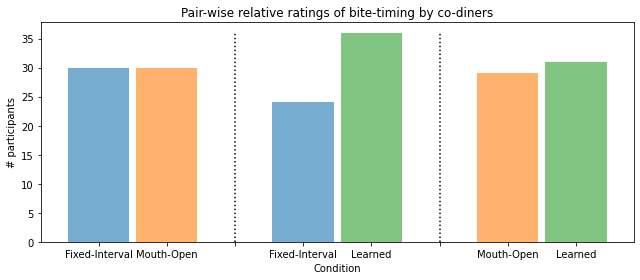

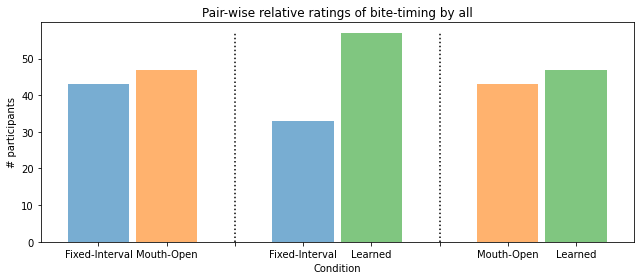

In [47]:
titles = ['Pair-wise relative ratings of bite-timing by target user', 
          'Pair-wise relative ratings of bite-timing by co-diners',
          'Pair-wise relative ratings of bite-timing by all'
         ]

for ratings_data, title in zip([relative_target_ratings, relative_codiner_ratings, relative_overall_ratings], titles):
    plt.figure(figsize=(9, 4))
    bin_width = 0.9

    x_pos = [0, 1, 3, 4, 6, 7]
    y = [ratings_data[comparison_type][condition] for comparison_type in comparison_types for condition in comparison_type]
    colors_list = get_colors_list(3)
    colors = [colors_list[0], colors_list[1], colors_list[0], colors_list[2], colors_list[1], colors_list[2]]

    plt.bar(x_pos, y, width=bin_width, align='center', alpha=0.6, color=colors)
    plt.vlines(2, 0, max(y), linestyles ="dotted", colors ="k")
    plt.vlines(5, 0, max(y), linestyles ="dotted", colors ="k")

    plt.xticks(np.arange(8), [condition_labels['a'], condition_labels['b'], '', condition_labels['a'], condition_labels['c'], '', condition_labels['b'], condition_labels['c']])
    plt.xlabel('Condition')
    plt.ylabel('# participants')
    plt.title(title)
#     plt.tick_params(bottom=False)
    plt.tight_layout()
    plt.show()

### 2.2.2 By all other factors:
- Distraction by the robot
- Ability to have natural conversations
- Ability to feel comfortable around the robot
- System reliability
- Ability to trust the system

In [49]:
json.dumps(target_ratings['2_1'])

'{"a": [2, 2, 1, 2, 5, 1, 3, 2, 3, 4, 4, 4, 4, 1, 3, 4, 5, 4, 1, 2, 1, 4, 4, 2, 5, 2, 2, 1, 2, 5, 5, 2, 4, 2], "b": [5, 4, 4, 5, 4, 4, 5, 3, 4, 1, 5, 2, 4, 4, 5, 3, 4, 4, 2, 1, 5, 4, 4, 5, 4, 3, 1, 5, 4, 3, 5, 3, 4], "c": [1, 4, 2, 4, 4, 3, 3, 2, 1, 1, 2, 4, 1, 4, 4, 5, 3, 3, 4, 2, 4, 3, 1, 1, 1, 3, 2, 5, 1, 2, 1, 3, 2]}'

In [50]:
json.dumps(target_ratings['2_2'])

'{"a": [5, 5, 5, 5, 2, 4, 5, 4, 5, 4, 4, 3, 4, 4, 5, 4, 5, 3, 5, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5], "b": [2, 5, 4, 4, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 5, 3, 4, 2, 4, 5, 4, 4, 4, 2, 5, 5, 4, 5, 5, 4, 2, 5, 4], "c": [4, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 2, 1, 3, 4, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 4, 5, 2, 5, 5, 4, 5, 4]}'

I felt distracted by the robot


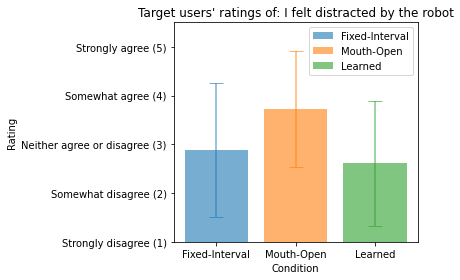

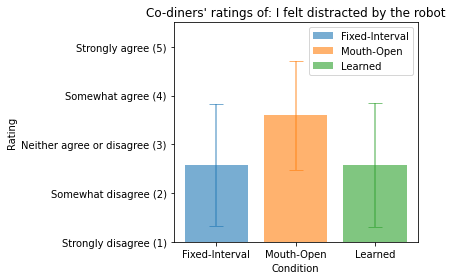

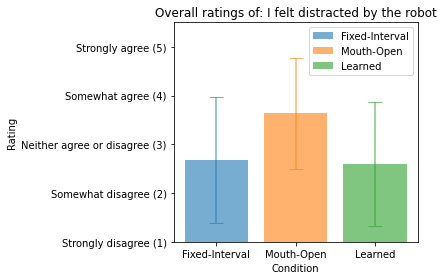

I was able to have a natural conversation with the group


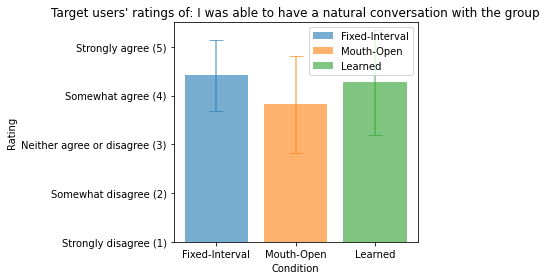

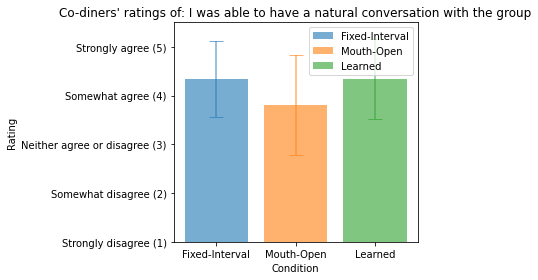

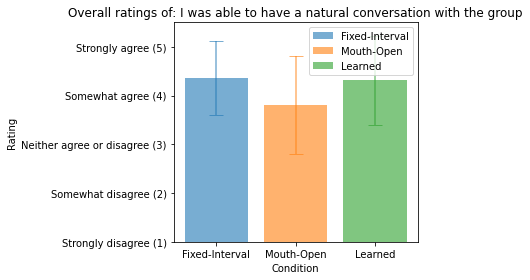

I felt comfortable around the robot


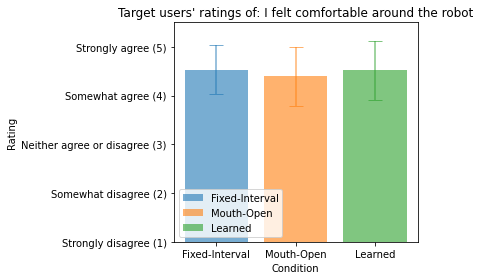

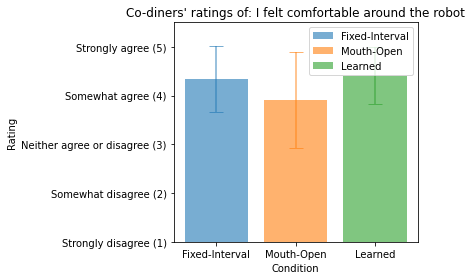

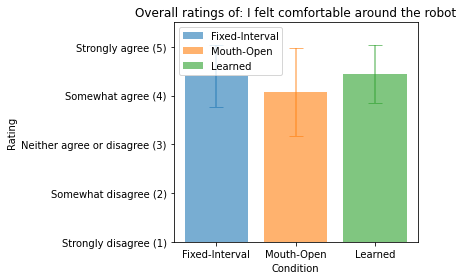

The system is reliable


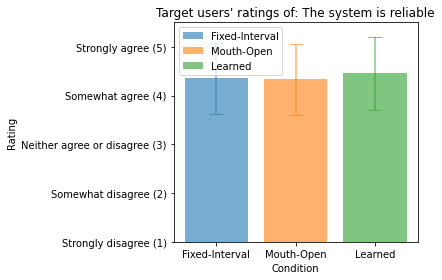

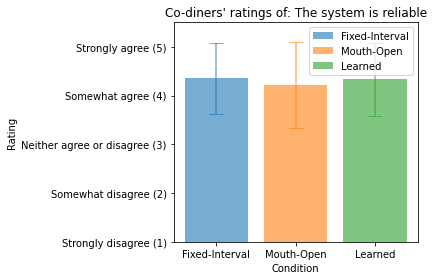

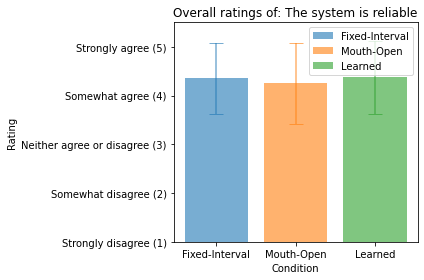

I can trust the system


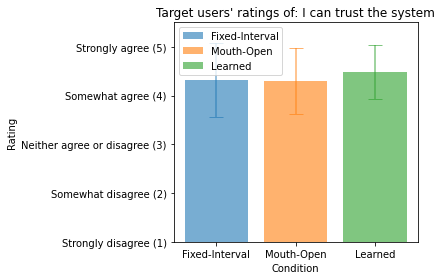

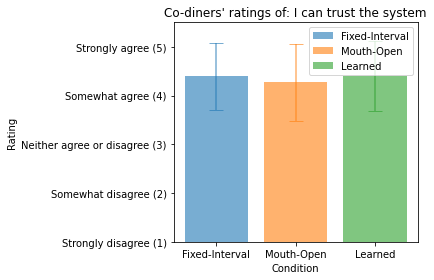

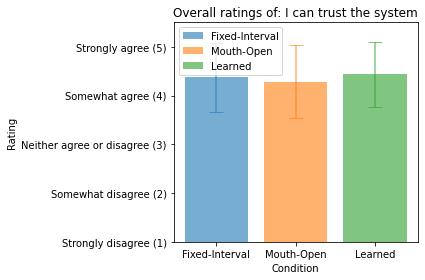

In [51]:
# rating_labels = ['1\nStrongly disagree', '2\nSomewhat disagree', '3\nNeither agree\nor disagree', '4\nSomewhat agree', '5\nStrongly agree']
rating_labels = ['Strongly disagree (1)', 'Somewhat disagree (2)', 'Neither agree or disagree (3)', 'Somewhat agree (4)', 'Strongly agree (5)']

for prompt_key in prompts.keys():
    if prompt_key == '1': continue
    print(prompts[prompt_key])
    
    titles = [f"Target users' ratings of: {prompts[prompt_key]}", 
              f"Co-diners' ratings of: {prompts[prompt_key]}",
              f"Overall ratings of: {prompts[prompt_key]}",
             ]
    for ratings_data, title in zip([target_ratings[prompt_key], codiner_ratings[prompt_key], overall_ratings[prompt_key]], titles):
        alpha = 0.6
        err_kw = dict(alpha=alpha, capsize=7, capthick=None)
        x_pos = np.arange(3)

        plt.figure()
        means = [np.mean(ratings_data[condition]) for condition in ['a', 'b', 'c']]
        stds = [np.std(ratings_data[condition]) for condition in ['a', 'b', 'c']]
        for x, mu, std, label, ecolor in zip(x_pos, means, stds, condition_labels.values(), get_colors_list(3)):
            err_kw.update(ecolor=ecolor)
            plt.bar(x, mu, alpha=alpha, yerr=std, error_kw=err_kw, label=label)
        plt.xticks(x_pos, condition_labels.values())
        plt.xlabel('Condition')
        plt.yticks(np.arange(5) + 1, rating_labels)
        plt.ylim(1, 5.5)
        plt.ylabel('Rating')
        plt.title(title)
    #     plt.grid(axis='y')
#             plt.tick_params(bottom=False)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        ############################################
        # Bar plot showing whole distributions
        ############################################
#         plt.figure(figsize=(8, 4))
#         bin_width = 0.25
#         for i, (condition, ratings) in enumerate(ratings_data.items()):
#             counts = Counter(ratings)
#             x_pos = [x + (i - 1.5)*bin_width for x in counts.keys() ]
#             plt.bar(x_pos, counts.values(), width=bin_width, align='edge', label=condition_labels[condition], alpha=0.6)

#         plt.xlim(0.5, 5.5)
#         plt.xticks(np.arange(5) + 1, rating_labels)
#         plt.xlabel('Rating')
#         plt.ylabel('# participants')
#         plt.legend()
#         plt.title(title)
#         plt.tight_layout()
#         plt.show()

        ############################################
        # Box plot
        ############################################
#         plt.figure()
#         c = 'blue'       
#         plt.boxplot([ratings_data['a'], ratings_data['b'], ratings_data['c']],
#                     # meanline=True, 
#                     showmeans=True,
#                     notch=True,
#                     showfliers=True,
#                     patch_artist=True,
#                     boxprops=dict(facecolor=c, color=c, alpha=0.2),
#                     capprops=dict(color=c),
#                     whiskerprops=dict(color=c),
#                     flierprops=dict(color=c, markeredgecolor=c),
#                     medianprops=dict(color=c),
#                    )
#         plt.xticks(np.arange(3) + 1, condition_labels.values())
#         plt.xlabel('Condition')
#         plt.yticks(np.arange(5) + 1, rating_labels)
#         plt.ylim(1, 5)
#         plt.ylabel('Rating')
#         plt.title(title)
#         plt.tight_layout()
#         plt.show()
        
    print('=' * 100)


## (OLD - UPDATE EVERYTHING BELOW) 2.2 Dining experience

### 2.2.1 Ratings

In [ ]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = [
    '1  Strongly disagree',
    '2  Disagree',
    '3  Somewhat disagree',
    '4  Neither agree or disagree',
    '5  Somewhat agree',
    '6  Agree',
    '7  Strongly agree',
]
x_rating_labels = [
    'Strongly\ndisagree',
    'Disagree',
    'Somewhat\ndisagree',
    'Neither\nagree or\ndisagree',
    'Somewhat\nagree',
    'Agree',
    'Strongly\nagree',
]
print('Dining experience ratings:')
aggregated_counts = []
for prompt_key, prompt in prompts.items():
    ratings_counter = Counter(post_df[prompt_key])
    ratings_counter.update({ rating_label: 0 for rating_label in rating_labels if rating_label not in ratings_counter })
    ratings_sorted = sorted(ratings_counter.items())
    print_item_counts(ratings_sorted, prompt)

    y_counts = [cnt for _, cnt in ratings_sorted]
    aggregated_counts.append(y_counts)
    plt.figure()
    plt.bar(x_rating_labels, y_counts, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('# participants')
    plt.title(f'Prompt: {prompt}')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.bar(x_rating_labels, np.array(y_counts) * 100 / 90, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('Fraction of participants (%)')
    plt.title(f'Prompt: {prompt}')
    plt.tight_layout()
    plt.show()


In [ ]:
# All prompts in one plot
ratings_range = np.arange(1, 8)
plt.figure(figsize=(7,5))
for i, (prompt, y_counts) in enumerate(zip(prompts.values(), aggregated_counts)):
    plt.bar(ratings_range + 0.2 * (i - 1), y_counts, alpha=0.6, width=0.2, label=prompt)
plt.legend()
plt.xticks(ratings_range, x_rating_labels)
plt.xlabel('Rating')
plt.ylabel('# participants')
plt.title(f'Dining experience ratings')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
for i, (prompt, y_counts) in enumerate(zip(prompts.values(), aggregated_counts)):
    plt.bar(ratings_range + 0.2 * (i - 1), np.array(y_counts) * 100 / 90, alpha=0.6, width=0.2, label=prompt)
plt.legend()
plt.xticks(ratings_range, x_rating_labels)
plt.xlabel('Rating')
plt.ylabel('Fraction of participants (%)')
plt.title(f'Dining experience ratings')
plt.tight_layout()
plt.show()

### 2.2.2 Open-ended questions

In [ ]:
open_questions = {
    'Q2': "Please list a few things that you liked about the meal experience you just had",
    'Q3': "Please list a few things that you didn't like about the meal experience you just had",
    'Q4': "When do you think it is appropriate to take a bite of food when you are eating with others? Please share your thoughts below."
}

for question_key, question in open_questions.items():
    print('=' * 150)
    print(question)
    print('=' * 150)
    responses_sorted = sorted([ (f'{session_id}_{participant_position}', response)  for session_id, participant_position, response in zip(post_df['I1'], post_df['I2'], post_df[question_key]) ])
    for participant_id, response in responses_sorted:
        print(f'{participant_id}\t| {response}')


# 3 Correlations

## 3.1 Between two relationship metrics

### 3.1.1 Co-diner relationship type vs. frequency of eating together

In [ ]:
relationship_type_labels = {
    'Friend': 'Friend',
    'Partner': 'Partner',
    'Professional (co-worker/classmate)': 'Professional',
    'Other, please specify': 'Other'
}
eating_together_freq_labels = {
    'Several times a day': 'Several times a day',
    'Almost every day': 'Almost every day',
    'Few times a week': 'Few times a week',
    'Few times a month': 'Few times a month',
    'Few times a year': 'Few times a year',
    'Never (this is the first time we are eating together)': 'Never (first time)'
}
relationship_counts = np.zeros((len(eating_together_freq_labels), len(relationship_type_labels)))

for side in ['L', 'R']:
    for relationship_type_label, eating_together_freq_label in zip(pre_df[f'{side}1'], pre_df[f'{side}3']):

        idx_x = np.where(np.array(list(relationship_type_labels.keys())) == relationship_type_label)[0]
        idx_y = np.where(np.array(list(eating_together_freq_labels.keys())) == eating_together_freq_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship type and frequency of eating together')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular co-diner type
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular co-diner type', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship type and frequency of eating together')
plt.tight_layout()
plt.show()


### 3.1.2 Co-diner relationship duration vs. frequency of eating together

In [ ]:
relationship_duration_labels = {
	'1 month - 1 year': '1 mo - 1 yr',
	'1 year - 2 years': '1 yr - 2 yr',
	'2 years - 5 years': '2 yr - 5 yr',
	'More than 5 years': 'More than\n5 yr'
}
eating_together_freq_labels = {
    'Several times a day': 'Several times a day',
    'Almost every day': 'Almost every day',
    'Few times a week': 'Few times a week',
    'Few times a month': 'Few times a month',
    'Few times a year': 'Few times a year',
    'Never (this is the first time we are eating together)': 'Never (first time)'
}
relationship_counts = np.zeros((len(eating_together_freq_labels), len(relationship_duration_labels)))

for side in ['L', 'R']:
    for relationship_duration_label, eating_together_freq_label in zip(pre_df[f'{side}2'], pre_df[f'{side}3']):

        idx_x = np.where(np.array(list(relationship_duration_labels.keys())) == relationship_duration_label)[0]
        idx_y = np.where(np.array(list(eating_together_freq_labels.keys())) == eating_together_freq_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship duration and frequency of eating together')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular duration
relationship_counts = relationship_counts / np.max(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular duration', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship duration and frequency of eating together')
plt.tight_layout()
plt.show()


### 3.1.3 Co-diner relationship type vs. relationship duration

In [ ]:
relationship_type_labels = {
    'Friend': 'Friend',
    'Partner': 'Partner',
    'Professional (co-worker/classmate)': 'Professional',
    'Other, please specify': 'Other'
}
relationship_duration_labels = {
	'1 month - 1 year': '1 mo - 1 yr',
	'1 year - 2 years': '1 yr - 2 yr',
	'2 years - 5 years': '2 yr - 5 yr',
	'More than 5 years': 'More than\n5 yr'
}
relationship_counts = np.zeros((len(relationship_duration_labels), len(relationship_type_labels)))

for side in ['L', 'R']:
    for relationship_type_label, relationship_duration_label in zip(pre_df[f'{side}1'], pre_df[f'{side}2']):

        idx_x = np.where(np.array(list(relationship_type_labels.keys())) == relationship_type_label)[0]
        idx_y = np.where(np.array(list(relationship_duration_labels.keys())) == relationship_duration_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Relationship duration')
plt.title('Correlation between co-diner relationship type and duration')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular co-diner type
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular co-diner type', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Relationship duration')
plt.title('Correlation between co-diner relationship type and duration')
plt.tight_layout()
plt.show()


## 3.2 Between two rating metrics

### 3.2.1 Food rating vs. social interaction rating

In [ ]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
participant_counts = np.zeros((len(rating_labels), len(rating_labels)))

for food_rating_label, social_interaction_rating_label in zip(post_df['Q1_3'], post_df['Q1_2']):

    idx_x = np.where(np.array(list(rating_labels.keys())) == food_rating_label)[0]
    idx_y = np.where(np.array(list(rating_labels.keys())) == social_interaction_rating_label)[0]
    participant_counts[idx_y, idx_x] += 1

print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# participants', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between food rating and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of participants with a particular food rating
participant_counts = participant_counts / np.sum(participant_counts, axis=0)
print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of participants with a particular food rating', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between food rating and social interaction rating')
plt.tight_layout()
plt.show()


### 3.2.2 Food rating vs. overall experience rating

In [ ]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
participant_counts = np.zeros((len(rating_labels), len(rating_labels)))

for food_rating_label, overall_experience_rating_label in zip(post_df['Q1_3'], post_df['Q1_1']):

    idx_x = np.where(np.array(list(rating_labels.keys())) == food_rating_label)[0]
    idx_y = np.where(np.array(list(rating_labels.keys())) == overall_experience_rating_label)[0]
    participant_counts[idx_y, idx_x] += 1

print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# participants', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between food rating and overall experience rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of participants with a particular food rating
participant_counts = participant_counts / np.sum(participant_counts, axis=0)
print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of participants with a particular food rating', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between food rating and overall experience rating')
plt.tight_layout()
plt.show()


### 3.2.3 Social interaction vs. overall experience rating

In [ ]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
participant_counts = np.zeros((len(rating_labels), len(rating_labels)))

for social_interaction_rating_label, overall_experience_rating_label in zip(post_df['Q1_2'], post_df['Q1_1']):

    idx_x = np.where(np.array(list(rating_labels.keys())) == social_interaction_rating_label)[0]
    idx_y = np.where(np.array(list(rating_labels.keys())) == overall_experience_rating_label)[0]
    participant_counts[idx_y, idx_x] += 1

print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# participants', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel(f'Social interaction rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between social interaction rating and overall experience rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of participants with a particular social interaction rating
participant_counts = np.nan_to_num( participant_counts / np.sum(participant_counts, axis=0) )
print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of participants with a particular social interaction rating', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel(f'Social interaction rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between social interaction rating and overall experience rating')
plt.tight_layout()
plt.show()


## 3.3 Between a relationship metric and a rating metric

### 3.3.1 Co-diner relationship type vs. social interaction rating

In [ ]:
relationship_type_labels = {
    'Friend': 'Friend',
    'Partner': 'Partner',
    'Professional (co-worker/classmate)': 'Professional',
    'Other, please specify': 'Other'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
relationship_counts = np.zeros((len(rating_labels), len(relationship_type_labels)))

for side in ['L', 'R']:
    for relationship_type_label, rating_label in zip(pre_df[f'{side}1'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(relationship_type_labels.keys())) == relationship_type_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship type and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular co-diner type
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular co-diner type', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship type and social interaction rating')
plt.tight_layout()
plt.show()


### 3.3.2 Co-diner relationship duration vs. social interaction rating

In [ ]:
relationship_duration_labels = {
	'1 month - 1 year': '1 mo - 1 yr',
	'1 year - 2 years': '1 yr - 2 yr',
	'2 years - 5 years': '2 yr - 5 yr',
	'More than 5 years': 'More than\n5 yr'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
relationship_counts = np.zeros((len(rating_labels), len(relationship_duration_labels)))

for side in ['L', 'R']:
    for relationship_duration_label, rating_label in zip(pre_df[f'{side}2'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(relationship_duration_labels.keys())) == relationship_duration_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship duration and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular duration
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular duration', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship duration and social interaction rating')
plt.tight_layout()
plt.show()


### 3.3.3 Frequency of eating together vs. social interaction rating

In [ ]:
eating_together_freq_labels = {
    'Several times a day': 'Several\ntimes a day',
    'Almost every day': 'Almost\nevery day',
    'Few times a week': 'Few times\na week',
    'Few times a month': 'Few time\n a month',
    'Few times a year': 'Few times\na year',
    'Never (this is the first time we are eating together)': 'Never\n(first time)'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
relationship_counts = np.zeros((len(rating_labels), len(eating_together_freq_labels)))

for side in ['L', 'R']:
    for eating_together_freq_label, rating_label in zip(pre_df[f'{side}3'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(eating_together_freq_labels.keys())) == eating_together_freq_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 7))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Frequency of eating together')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between frequency of eating together and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular frequency of eating together
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 7))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular frequency of eating together', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Frequency of eating together')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between frequency of eating together and social interaction rating')
plt.tight_layout()
plt.show()


## 3.4 Between a social dining habit metric and a rating metric

### 3.4.1 Typical co-diner type vs. social interaction rating

In [ ]:
codiner_type_labels = {
    'Alone': 'Alone', 
    'Random people': 'Random\npeople', 
    'Co-workers': 'Co-workers', 
    'Friends/roommates': 'Friends or\nroommates', 
    'Family': 'Family', 
    'Other, please specify': 'Other'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}

for i, meal_type in enumerate(['Breakfast', 'Lunch', 'Dinner']):
    participant_count = np.zeros((len(rating_labels), len(codiner_type_labels)))
    print('=' * 120)
    print(meal_type)
    for codiner_type_label, rating_label in zip(pre_df[f'S1_{i + 1}'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(codiner_type_labels.keys())) == codiner_type_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        participant_count[idx_y, idx_x] += 1

    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='# participants', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(codiner_type_labels.values())), codiner_type_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical co-diner type')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} co-diner type and social interaction rating')
    plt.tight_layout()
    plt.show()

    # Normalize by the total number of participants with a particular typical co-diner type
    participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )
    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='Fraction of participants with a particular typical co-diner type', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(codiner_type_labels.values())), codiner_type_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical co-diner type')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} co-diner type and social interaction rating')
    plt.tight_layout()
    plt.show()


### 3.4.2 Typical social dining frequency vs. social interaction rating

In [ ]:
dining_freq_range = np.arange(8)
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}

for i, meal_type in enumerate(['Breakfast', 'Lunch', 'Dinner']):
    participant_count = np.zeros((len(rating_labels), len(dining_freq_range)))
    print('=' * 120)
    print(meal_type)
    for dining_freq, rating_label in zip(pre_df[f'S2_{i + 1}'], post_df['Q1_2']):
        idx_x = np.where(dining_freq_range == np.int64(dining_freq))[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        participant_count[idx_y, idx_x] += 1

    print(participant_count)
    plt.figure(figsize=(10, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='# participants', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(dining_freq_range, dining_freq_range)
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical social dining frequency (# times / week)')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} social dining frequency and social interaction rating')
    plt.tight_layout()
    plt.show()

    # Normalize by the total number of participants with a particular typical social dining frequency
    participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )
    print(participant_count)
    plt.figure(figsize=(10, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='Fraction of participants with a particular typical social dining frequency', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(dining_freq_range, dining_freq_range)
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical social dining frequency (# times / week)')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} social dining frequency and social interaction rating')
    plt.tight_layout()
    plt.show()


### 3.4.3 Typical dining location vs. social interaction rating

In [ ]:
location_labels = {
    'At home': 'At home',
    'At restaurant': 'At restaurant',
    'At work': 'At work',
    'Other, please specify': 'Other'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}

for i, meal_type in enumerate(['Breakfast', 'Lunch', 'Dinner']):
    participant_count = np.zeros((len(rating_labels), len(location_labels)))
    print('=' * 120)
    print(meal_type)
    for location_label, rating_label in zip(pre_df[f'S3_{i + 1}'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(location_labels.keys())) == location_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        participant_count[idx_y, idx_x] += 1

    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='# participants', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(location_labels.values())), location_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical dining location')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} dining location and social interaction rating')
    plt.tight_layout()
    plt.show()

    # Normalize by the total number of participants with a particular typical dining location
    participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )
    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='Fraction of participants with a particular typical dining location', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(location_labels.values())), location_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical dining location')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} dining location and social interaction rating')
    plt.tight_layout()
    plt.show()


# Further steps

In [ ]:
# One could further compute the strength of association between 2 nominal variables
# E.g. using Cramer's V: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html
# Or r-squared / coefficient of determination
